# Decision Tree Algorith with Iris Dataset

## Step 1: Import Necessary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes=True)

from sklearn.model_selection import train_test_split

## Step: Loading the Iris Dataset
The Iris dataset is a well-known dataset in the machine learning community. It consists of 150 samples of iris flowers, with 50 samples of each of three different species

In [2]:
# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
print("iris dataset is {}".format(iris.DESCR))
print("iris data size is {}".format(iris.data.shape))

iris dataset is .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each o

## Step. Convert to a Pandas DataFrame

In [3]:
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column if needed
iris_df['target'] = iris.target

# Add Species column using iris.target and target_names
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


__Remarks__
1. `load_iris()` returns a Bunch object, which behaves like a dictionary.
2. `iris.data` contains the feature values (in an array).
3. `iris.feature_names` provides column names for the DataFrame.
4. `iris.target` contains the target labels, which can be added as a column.
5. The Iris dataset in `sklearn` contains only numerical labels (0, 1, 2) in the target column, representing the species. These correspond to the following species:
   1. 0: Setosa
   2. 1: Versicolor
   3. 2: Virginica
6. To add a Species column with the actual species names, you can map the numerical values to their corresponding names using the `target_names` attribute.

In [4]:
iris_df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Data Visualization

### Scatter Plot With SepalLength on X_Axis and SepalWidth on Y_Axis

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

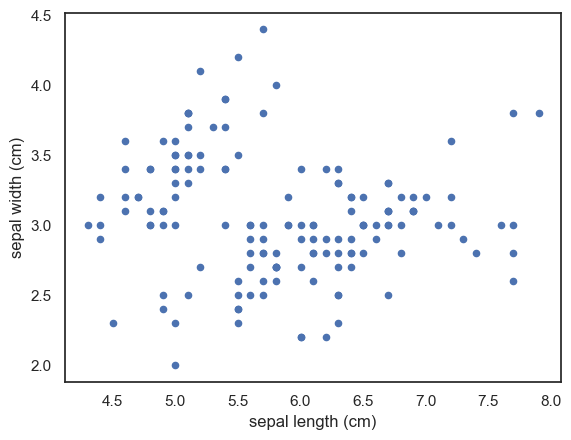

In [5]:
iris_df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

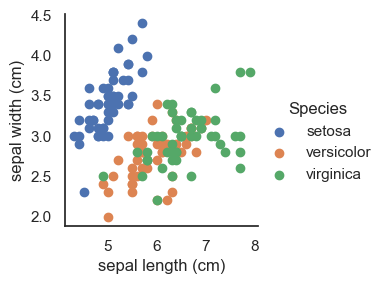

In [6]:
sns.FacetGrid(iris_df, hue="Species") \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

### Box Plot With Species on x-axis and `petal length (cm)` on y-axis

<Axes: xlabel='Species', ylabel='petal length (cm)'>

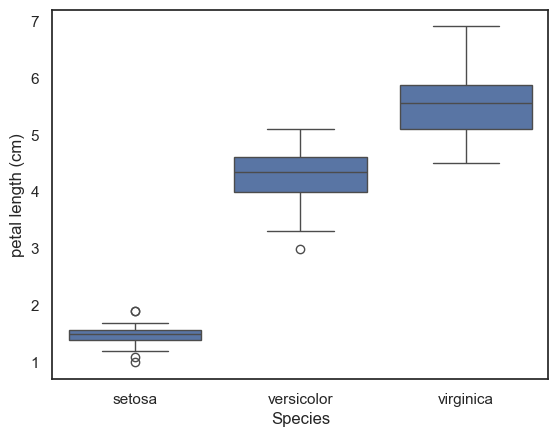

In [7]:
sns.boxplot(x="Species", y="petal length (cm)", data=iris_df)

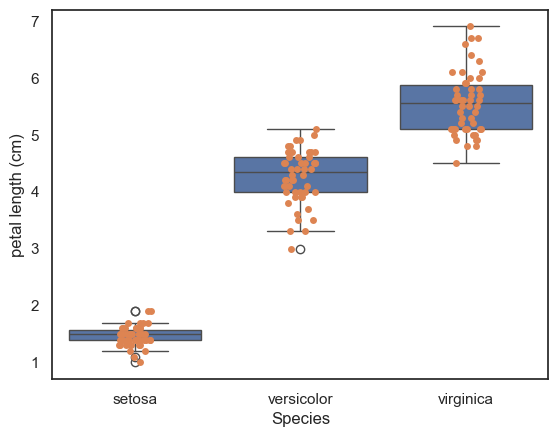

In [8]:
ax = sns.boxplot(x="Species", y="petal length (cm)", data=iris_df)
ax = sns.stripplot(x="Species", y="petal length (cm)", data=iris_df, jitter=True, edgecolor="gray")

### Violin Plot

<Axes: xlabel='Species', ylabel='petal length (cm)'>

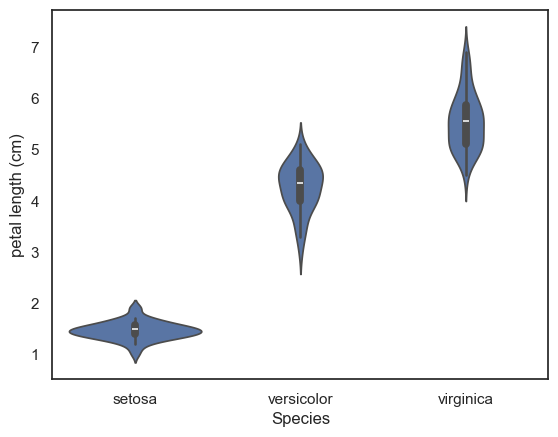

In [9]:
sns.violinplot(x="Species", y="petal length (cm)", data=iris_df)

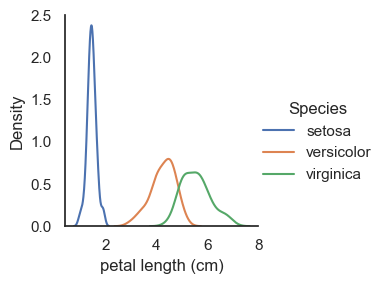

In [10]:
sns.FacetGrid(iris_df, hue="Species") \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()

### Pair Plot

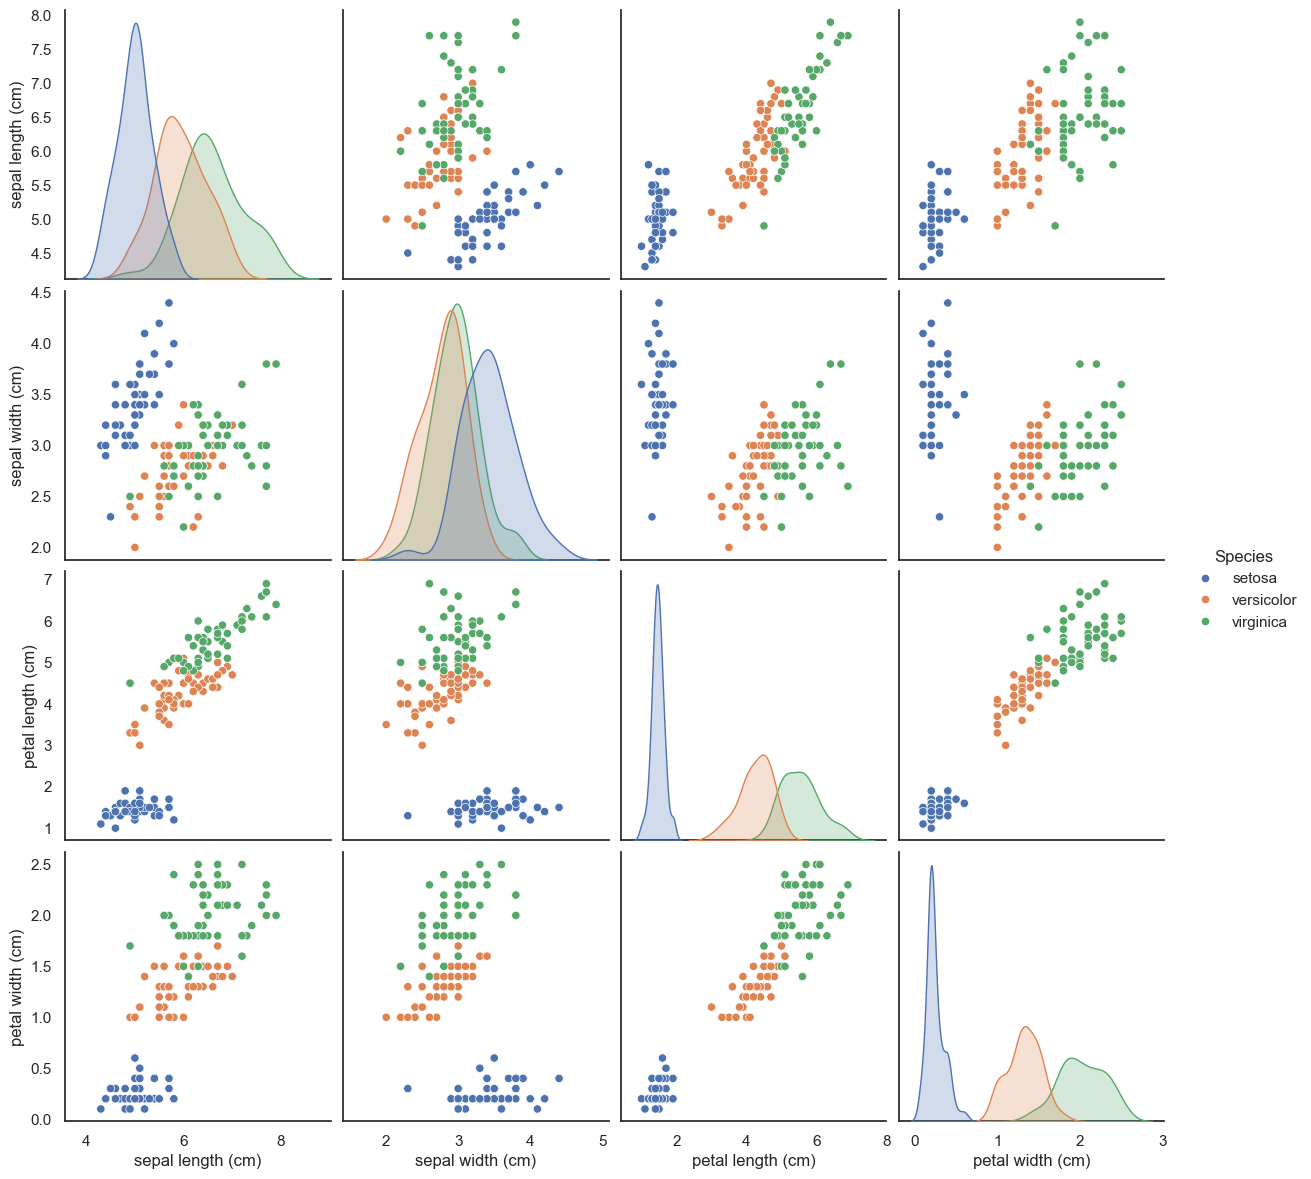

In [11]:
sns.pairplot(iris_df.drop("target", axis=1), hue="Species", size=3)

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[Species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[Species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[Species]'>]],
      dtype=object)

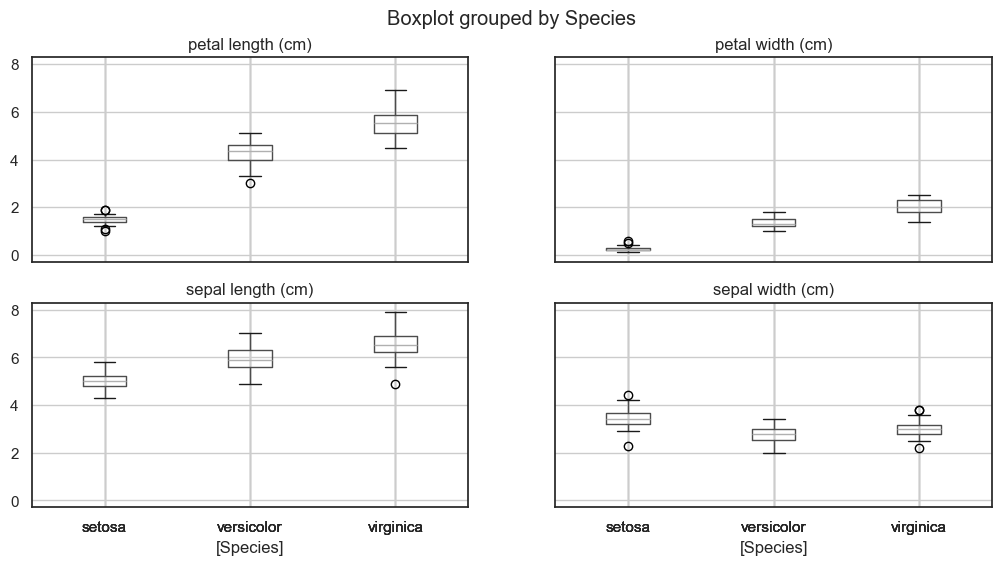

In [12]:
iris_df.drop("target", axis=1).boxplot(by="Species", figsize=(12, 6))

## Step: Splitting Data into Training and Testing Sets
It is important to split the data into training and testing sets to evaluate the performance of the machine learning model. The following code can be used to split the data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

## Step : Building a Decision Tree Classifier
Decision trees are simple yet powerful models for classification. The following code can be used to build a decision tree classifier:

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

## Step : Evaluating the Model Performance
Once the model is built, it is important to evaluate its performance. The following code can be used to calculate the accuracy of the model on the test set:

In [15]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

NameError: name 'X_test' is not defined